# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Leif Sean Kusumo
- **Email:** leif.sean@ti.ukdw.ac.id
- **ID Dicoding:** zeronox


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap perbedaan penyewaan sepeda antara pengguna casual dan registered?
- Apakah ada tren penyewaan sepeda berdasarkan musim (season) dan apakah pengguna casual dan registered menunjukkan pola yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Data Wrangling

### Gathering Data

In [4]:
day_path = "https://raw.githubusercontent.com/ZeroAce25/Proyek-Analisis-Data-Dicoding/refs/heads/main/data/day.csv?token=GHSAT0AAAAAACYLT5WDA23U7JR2LORGRKAAZX5NXZA"
hour_path = "https://raw.githubusercontent.com/ZeroAce25/Proyek-Analisis-Data-Dicoding/refs/heads/main/data/hour.csv?token=GHSAT0AAAAAACYLT5WCUSUVMYPZJK47HWM6ZX5NYLA"

dataset_day = pd.read_csv(day_path)
dataset_hour = pd.read_csv(hour_path)

**Insight:**
- Dataset yang digunakan ada dua yaitu day.csv(penyewaan sepeda berdasarkan hari) dan hour.csv(penyewaan sepeda berdasarkan jam)
- Kolom - kolom yang akan menjadi titik fokus adalah casual dan registered

### Assessing Data

In [7]:
# Melihat beberapa baris pertama dari dataset
dataset_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Melihat beberapa baris pertama dari dataset
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Memeriksa informasi umum dan statistik deskriptif
dataset_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
# Memeriksa informasi umum dan statistik deskriptif
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom yang akan dianalisis adalah casual, registered, season, weathersit
- Masing" Dataset memiliki jumlah kolom yang berbeda. 'day.csv' memiliki 731 baris dan 15 kolom, sedangkan 'hour.csv' memiliki 17379 baris dan 13 kolom

### Cleaning Data

In [18]:
#Mengubah type data dari object ke datetime
tanggal = ["dteday"]

for column in tanggal:
  dataset_day[column] = pd.to_datetime(dataset_day[column])
  dataset_hour[column] = pd.to_datetime(dataset_hour[column])
# Memeriksa missing values
print(dataset_day.isnull().sum())
print(dataset_hour.isnull().sum())

# Menghapus atau mengisi missing values jika ada
dataset_day.dropna(inplace=True)
dataset_hour.dropna(inplace=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ditemukan missing values
- Data siap dianalisis

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menampilkan statistik deskriptif untuk pengguna casual dan registered berdasarkan kondisi cuaca
weather_effects = dataset_day.groupby('weathersit')[['casual', 'registered', 'cnt']].mean()
weather_effects
# Menampilkan rata-rata penyewaan berdasarkan musim
season_avg = dataset_day.groupby('season')[['casual', 'registered', 'cnt']].mean()
season_avg

,casual,registered,cnt
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921


**Insight:**
- Rata-rata terbesar ada di season 2
- Kebanyakan registered rata-rata nya lebih besar daripada casual

## Visualization & Explanatory Analysis

### Pertanyaan 1:

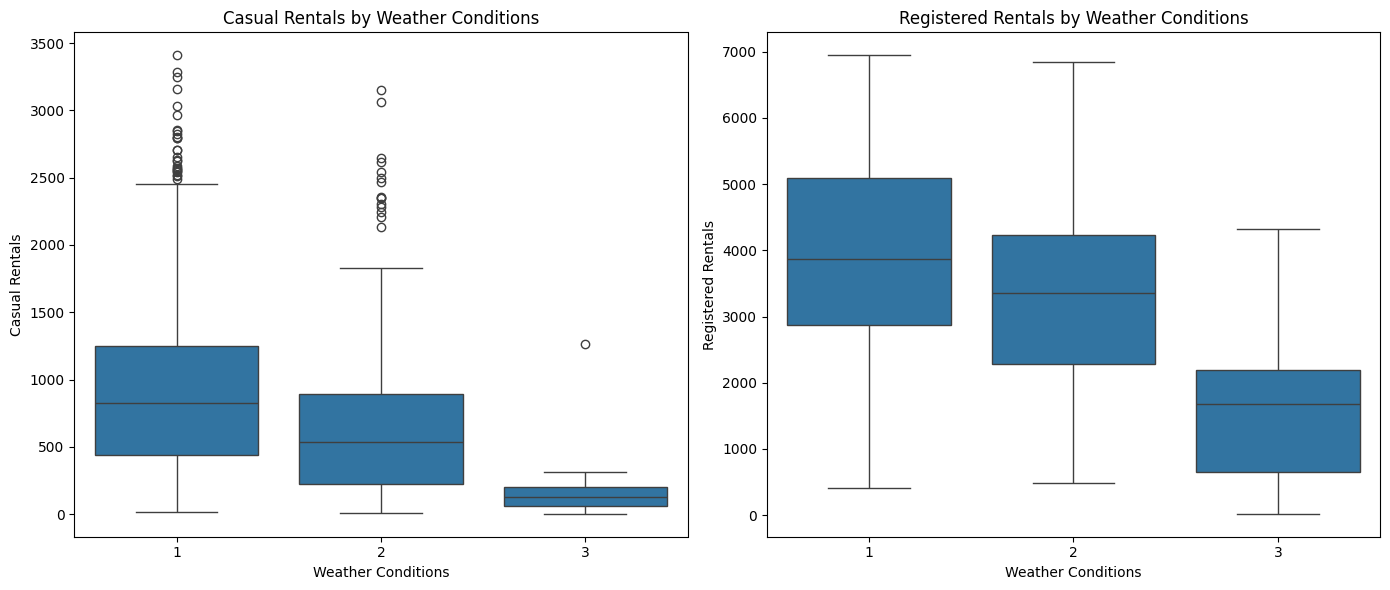

In [ ]:
# Boxplot untuk membandingkan penyewaan casual dan registered berdasarkan kondisi cuaca
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='casual', data=dataset_day)
plt.title('Casual Rentals by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Casual Rentals')

plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='registered', data=dataset_day)
plt.title('Registered Rentals by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Registered Rentals')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

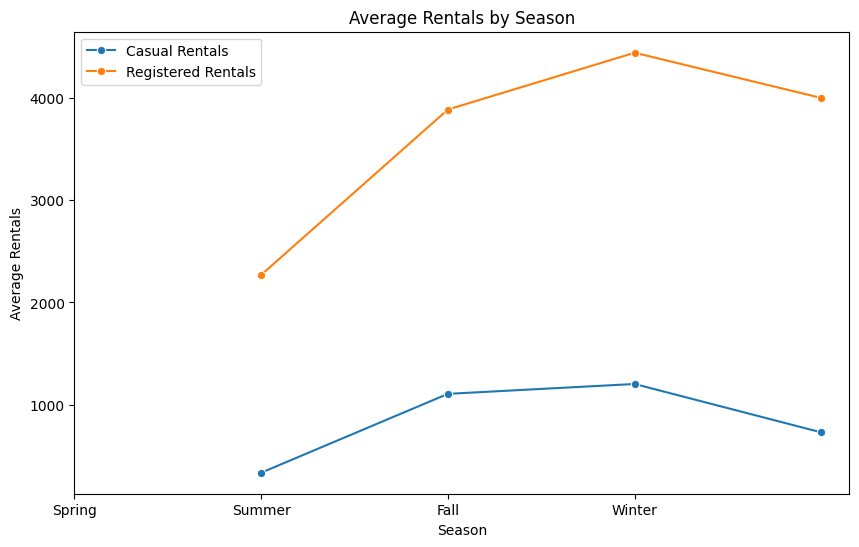

In [ ]:
# Line plot untuk menunjukkan tren penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))

sns.lineplot(data=season_avg.reset_index(), x='season', y='casual', label='Casual Rentals', marker='o')
sns.lineplot(data=season_avg.reset_index(), x='season', y='registered', label='Registered Rentals', marker='o')

plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(ticks=range(4), labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend()
plt.show()

**Insight:**
- Penyewaan sepeda mengalami penurunan yang signifikan pada kondisi cuaca buruk (misalnya cuaca hujan atau sangat berangin), yang lebih terlihat pada pengguna casual. Hal ini menunjukkan bahwa pengguna casual mungkin lebih sensitif terhadap kondisi cuaca dibandingkan pengguna registered yang mungkin lebih terbiasa atau lebih memiliki kebutuhan untuk menyewa sepeda meskipun cuaca tidak ideal.
- Musim dingin (Winter) menunjukkan angka penyewaan yang paling rendah untuk kedua jenis pengguna. Ini mencerminkan bahwa cuaca yang dingin dan mungkin berbahaya mengurangi keinginan orang untuk bersepeda.

## Conclusion

- Dari boxplot yang menunjukkan penyewaan sepeda berdasarkan kondisi cuaca, terlihat bahwa pengguna registered cenderung menyewa sepeda lebih banyak dibandingkan dengan pengguna casual di semua kondisi cuaca. Pada kondisi cuaca yang baik (misalnya cerah), baik pengguna casual maupun registered menunjukkan peningkatan penyewaan yang signifikan, dengan pengguna registered tetap mendominasi jumlah penyewaan.
- Dari line plot yang menunjukkan tren penyewaan berdasarkan musim, terlihat adanya variasi yang signifikan antara musim. Penyewaan sepeda paling tinggi terjadi pada musim panas (Summer) untuk kedua kategori pengguna, baik casual maupun registered. Hal ini menunjukkan bahwa cuaca yang lebih hangat dan panjangnya waktu siang mungkin mendorong lebih banyak orang untuk menggunakan sepeda sebagai sarana transportasi.